In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:

df = pd.read_csv('placement.csv')
df.shape

(1000, 3)

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_11360\3064321036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_11360\3064321036.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

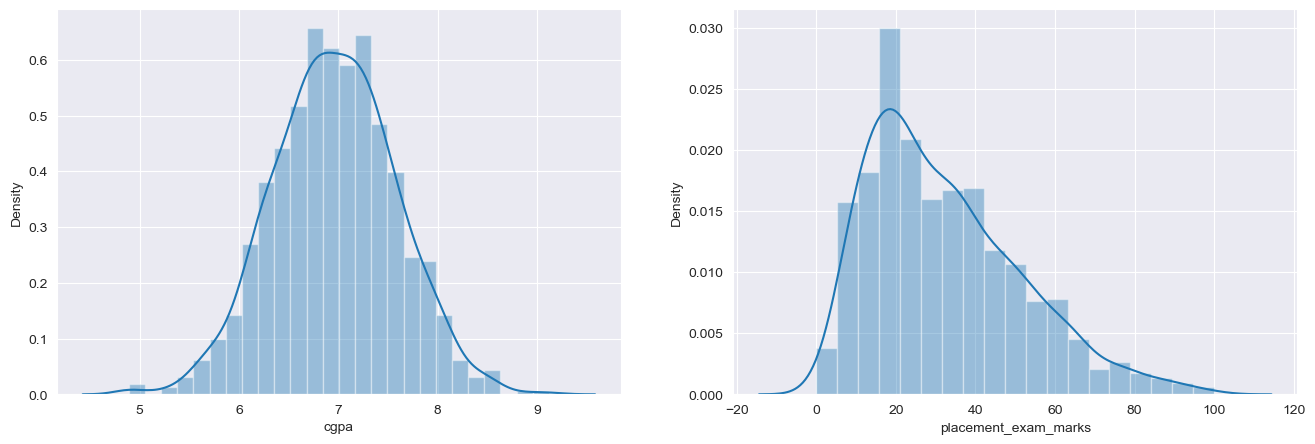

In [56]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [57]:
df['cgpa'].skew()

-0.014529938929314918

In [58]:
df['placement_exam_marks'].skew()

0.8356419499466834

<Axes: >

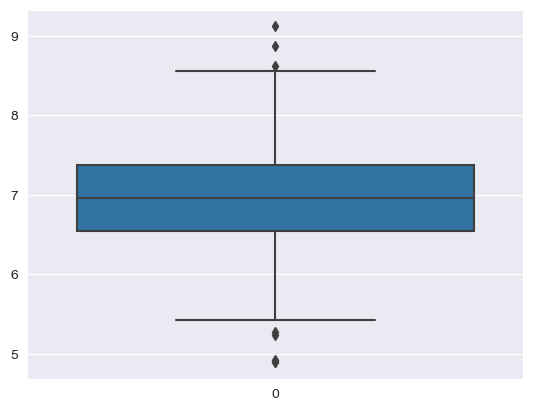

In [59]:
sns.boxplot(df['cgpa'])

# Finding IQR

In [60]:
cg_Q1 = df['cgpa'].quantile(0.25)
cg_Q3 = df['cgpa'].quantile(0.75)

mx_Q1 = df['placement_exam_marks'].quantile(0.25)
mx_Q3 = df['placement_exam_marks'].quantile(0.75)

In [61]:
print(cg_Q1,cg_Q3)
print(mx_Q1,mx_Q3)

6.55 7.37
17.0 44.0


In [62]:
iqr_cg = cg_Q3 - cg_Q1
iqr_mx = mx_Q3 - mx_Q1
print(iqr_cg,iqr_mx)

0.8200000000000003 27.0


In [63]:
upper_limit_cg = cg_Q3 + 1.5*iqr_cg
lower_limit_cg = cg_Q1 - 1.5*iqr_cg

upper_limit_mx = mx_Q3 + 1.5*iqr_mx
lower_limit_mx = mx_Q1 - 1.5*iqr_mx

In [64]:
print(lower_limit_cg,upper_limit_cg)
print(lower_limit_mx,upper_limit_mx)

5.319999999999999 8.600000000000001
-23.5 84.5


### outlier

In [65]:
df[(df['cgpa'] < lower_limit_cg) | (df['cgpa'] > upper_limit_cg) | (df['placement_exam_marks'] < lower_limit_mx) | (df['placement_exam_marks'] > upper_limit_mx) ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
278,5.23,17.0,1
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0


In [66]:
new_df = df[(df['cgpa'] > lower_limit_cg) & (df['cgpa'] < upper_limit_cg) & (df['placement_exam_marks'] > lower_limit_mx) & (df['placement_exam_marks'] < upper_limit_mx) ]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


In [67]:
new_df.shape

(977, 3)

<Axes: >

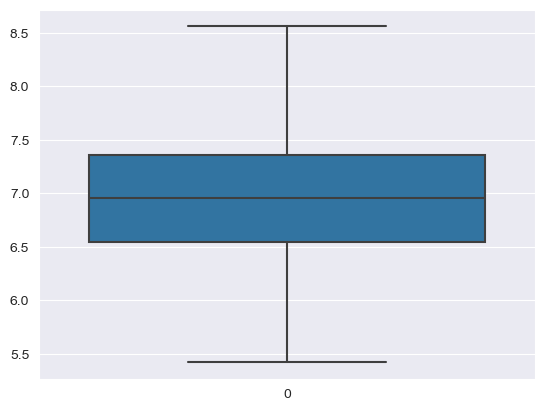

In [68]:
sns.boxplot(new_df['cgpa'])

<Axes: >

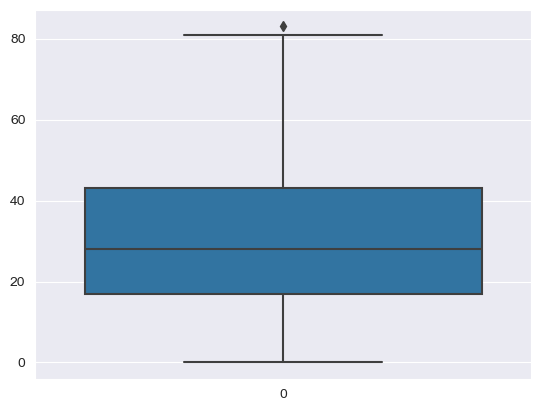

In [69]:
sns.boxplot(new_df['placement_exam_marks'])